In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
df = pd.read_csv('Life-Expectancy-Data-Updated.csv')

## Data Cleaning

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Ensure correct data types
df['Year'] = df['Year'].astype(int)
df['Country'] = df['Country'].astype(str)
df['Region'] = df['Region'].astype(str)

Missing values in each column:
Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64


## Feature Engineering

In [ ]:
# Combine 'Economy_status_Developed' and 'Economy_status_Developing' into a single variable
def economic_status(row):
    if row['Economy_status_Developed'] == 1:
        return 'Developed'
    else:
        return 'Developing'

df['Economic_Status'] = df.apply(economic_status, axis=1)

# Drop the original economy status columns
df.drop(['Economy_status_Developed', 'Economy_status_Developing'], axis=1, inplace=True)

# Create an average immunization score
df['Avg_Immunization'] = df[['Hepatitis_B', 'Measles', 'Polio', 'Diphtheria']].mean(axis=1)

# Create mortality ratio
df['Adult_to_Infant_Mortality_Ratio'] = df['Adult_mortality'] / (df['Infant_deaths'] + 1)

# Log transformation of GDP per capita
df['GDP_per_capita_log'] = np.log(df['GDP_per_capita'] + 1)

# Combine thinness variables
df['Thinness_children_adolescents'] = df[['Thinness_ten_nineteen_years', 'Thinness_five_nine_years']].mean(axis=1)

# Combine infant and under-five deaths
df['Child_deaths'] = df['Infant_deaths'] + df['Under_five_deaths']

## Handling Multicollinearity

In [ ]:
#  Drop individual immunization variables since we have 'Avg_Immunization'
df.drop(['Hepatitis_B', 'Measles', 'Polio', 'Diphtheria'], axis=1, inplace=True)

# Drop 'GDP_per_capita' since we have 'GDP_per_capita_log'
df.drop('GDP_per_capita', axis=1, inplace=True)

# Drop original thinness variables
df.drop(['Thinness_ten_nineteen_years', 'Thinness_five_nine_years'], axis=1, inplace=True)

# Drop original child mortality variables
df.drop(['Infant_deaths', 'Under_five_deaths'], axis=1, inplace=True)

# Address dummy variable trap for 'Economic_Status'
# Since we have 'Economic_Status' as a categorical variable, we need to encode it
df = pd.get_dummies(df, columns=['Economic_Status'], drop_first=True)

## Recalculating VIFs

In [ ]:
# Prepare the list of features for VIF calculation
# Exclude target variable 'Life_expectancy' and non-numeric columns
features = df.select_dtypes(include=[np.number]).columns.tolist()
features.remove('Life_expectancy')  # Remove target variable

# Prepare the data for VIF calculation
X = df[features]

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nVIF values after adjustments:")
print(vif_data)


VIF values after adjustments:
                            feature         VIF
0                              Year  637.956691
1                   Adult_mortality   33.011965
2               Alcohol_consumption    6.165329
3                               BMI  345.813364
4                     Incidents_HIV    3.576713
5                    Population_mln    1.233581
6                         Schooling   29.347541
7                  Avg_Immunization   83.525004
8   Adult_to_Infant_Mortality_Ratio   11.626122
9                GDP_per_capita_log  150.249350
10    Thinness_children_adolescents    4.502696
11                     Child_deaths   16.875534


In [ ]:
# Save the cleaned and prepared dataset
df.to_csv('Cleaned_Life_Expectancy_Data.csv', index=False)

print("\nData cleaning and feature engineering complete. Cleaned data saved to 'Cleaned_Life_Expectancy_Data.csv'.")


Data cleaning and feature engineering complete. Cleaned data saved to 'Cleaned_Life_Expectancy_Data.csv'.


## Visualizations

In [3]:
df = pd.read_csv('Cleaned_Life_Expectancy_Data.csv')
print(df.describe())

              Year  Adult_mortality  Alcohol_consumption          BMI  \
count  2864.000000      2864.000000          2864.000000  2864.000000   
mean   2007.500000       192.251775             4.820882    25.032926   
std       4.610577       114.910281             3.981949     2.193905   
min    2000.000000        49.384000             0.000000    19.800000   
25%    2003.750000       106.910250             1.200000    23.200000   
50%    2007.500000       163.841500             4.020000    25.500000   
75%    2011.250000       246.791375             7.777500    26.400000   
max    2015.000000       719.360500            17.870000    32.100000   

       Incidents_HIV  Population_mln    Schooling  Life_expectancy  \
count    2864.000000     2864.000000  2864.000000      2864.000000   
mean        0.894288       36.675915     7.632123        68.856075   
std         2.381389      136.485867     3.171556         9.405608   
min         0.010000        0.080000     1.100000        39.40

c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


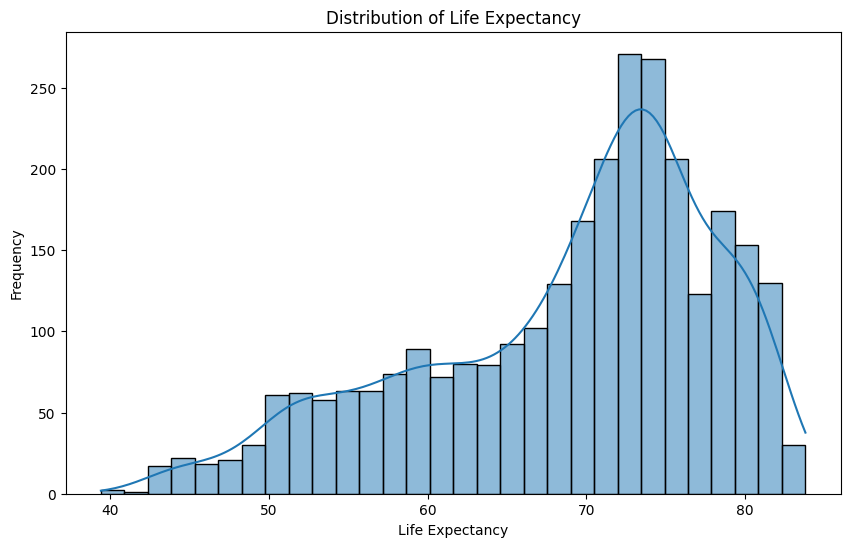

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(df['Life_expectancy'], bins=30, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

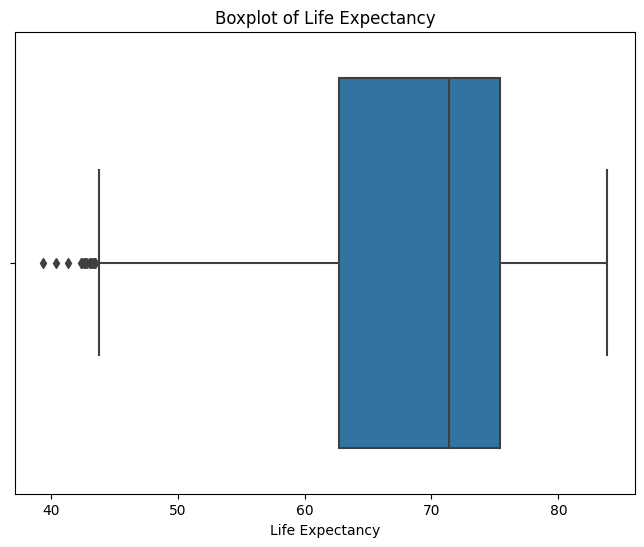

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Life_expectancy'])
plt.title('Boxplot of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.show()

C:\Users\sabme\AppData\Local\Temp\ipykernel_5496\2772263935.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Life_expectancy', ci=None)
c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


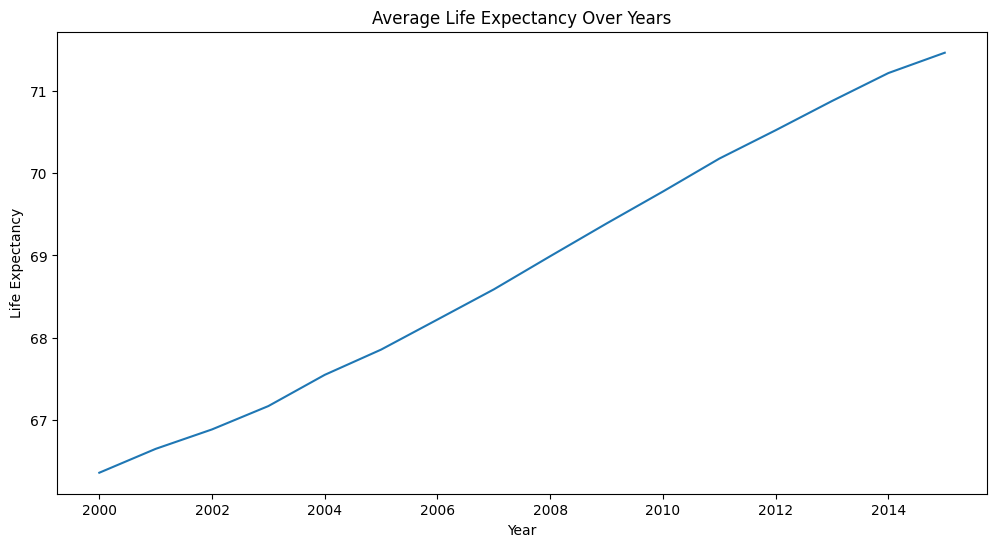

In [6]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Life_expectancy', ci=None)
plt.title('Average Life Expectancy Over Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

C:\Users\sabme\AppData\Local\Temp\ipykernel_5496\1047834229.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Life_expectancy', hue='Economic_Status_Developing', ci=None)
c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pas

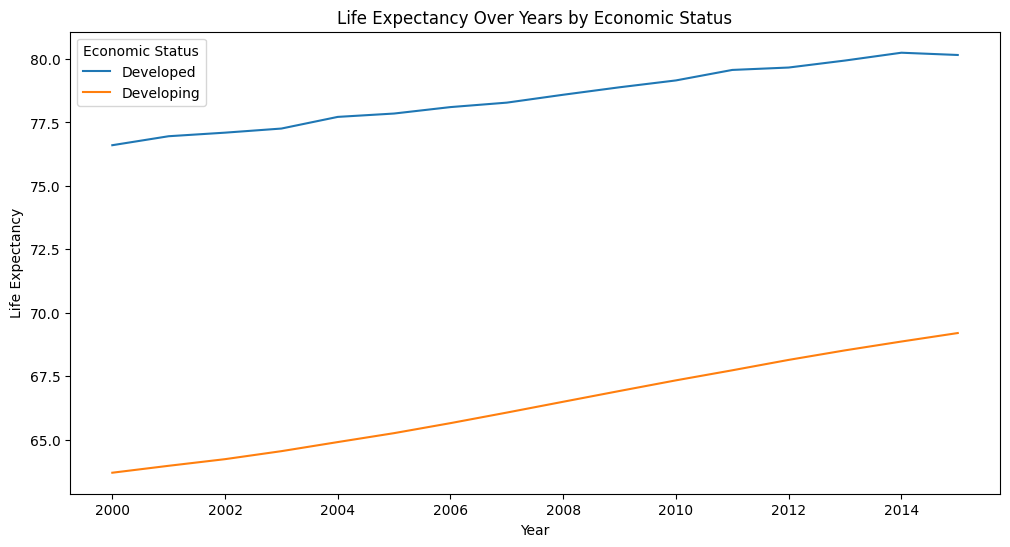

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Life_expectancy', hue='Economic_Status_Developing', ci=None)
plt.title('Life Expectancy Over Years by Economic Status')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Economic Status', labels=['Developed', 'Developing'])
plt.show()

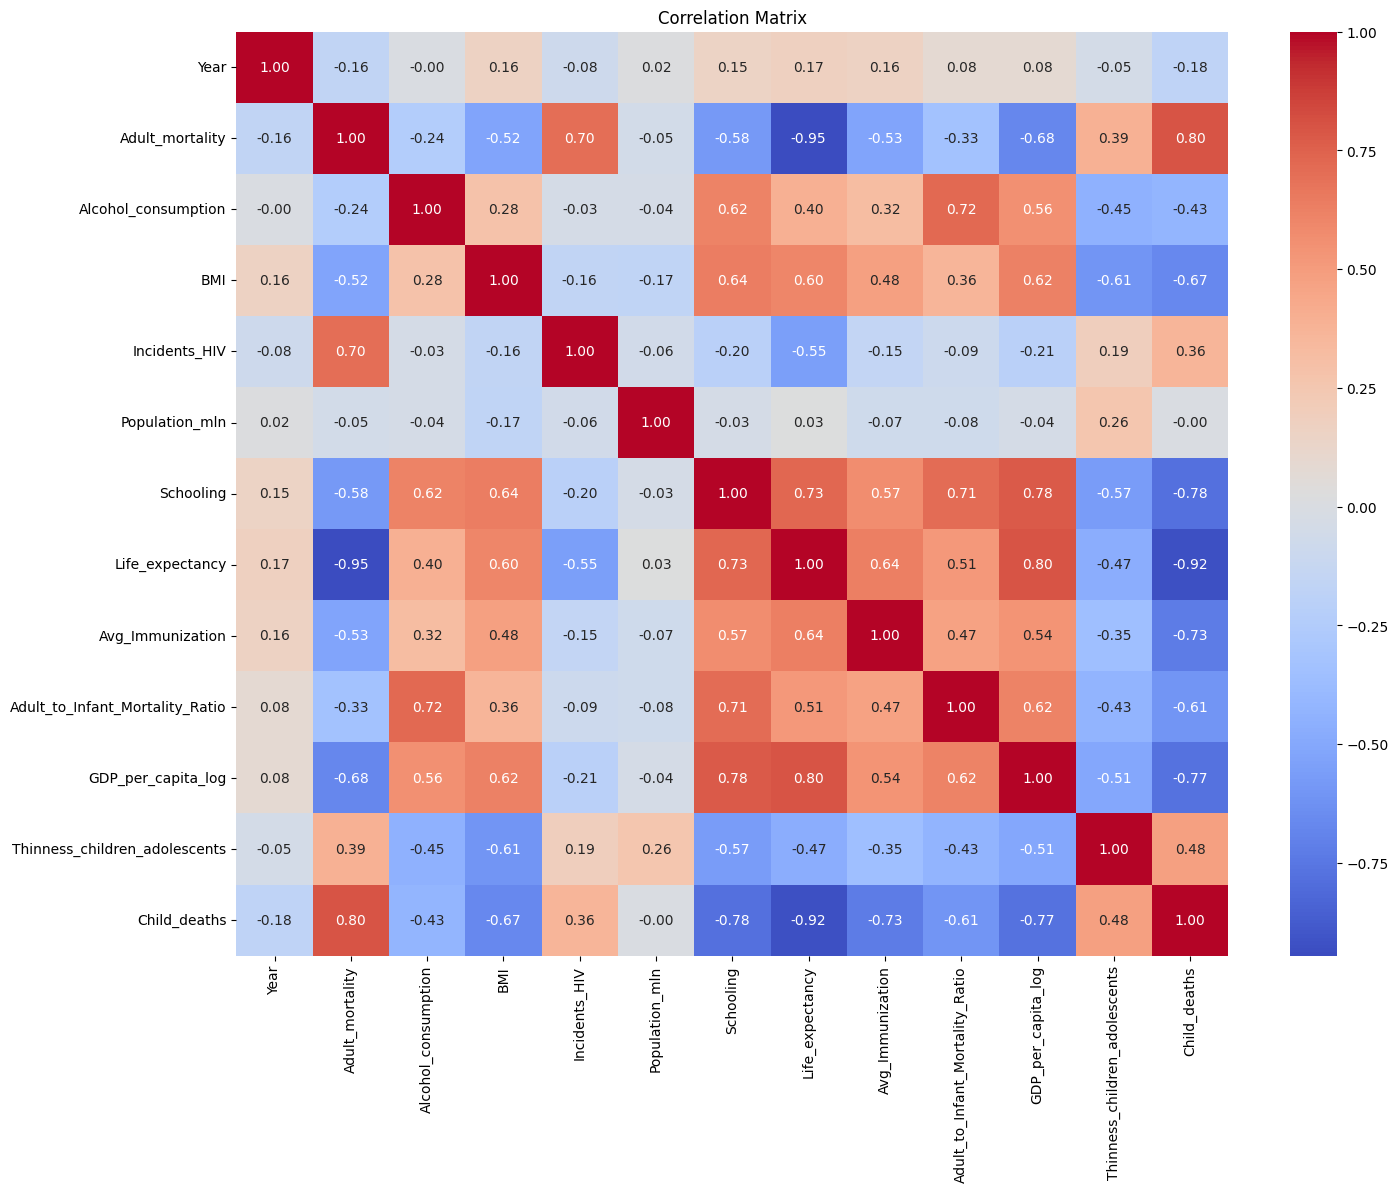

In [9]:
plt.figure(figsize=(16,12))
numeric_df = df.select_dtypes(include=[np.number]) 
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

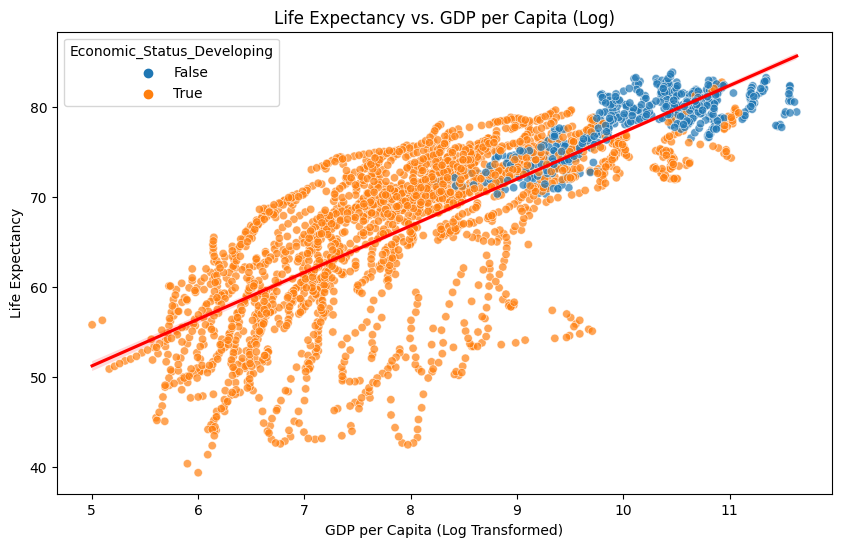

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GDP_per_capita_log', y='Life_expectancy', hue='Economic_Status_Developing', alpha=0.7)
sns.regplot(data=df, x='GDP_per_capita_log', y='Life_expectancy', scatter=False, color='red')
plt.title('Life Expectancy vs. GDP per Capita (Log)')
plt.xlabel('GDP per Capita (Log Transformed)')
plt.ylabel('Life Expectancy')
plt.show()

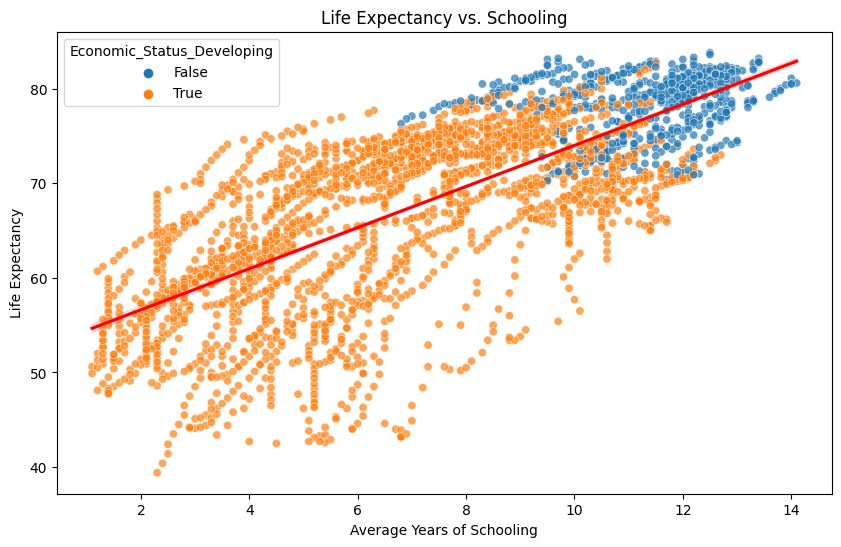

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Schooling', y='Life_expectancy', hue='Economic_Status_Developing', alpha=0.7)
sns.regplot(data=df, x='Schooling', y='Life_expectancy', scatter=False, color='red')
plt.title('Life Expectancy vs. Schooling')
plt.xlabel('Average Years of Schooling')
plt.ylabel('Life Expectancy')
plt.show()

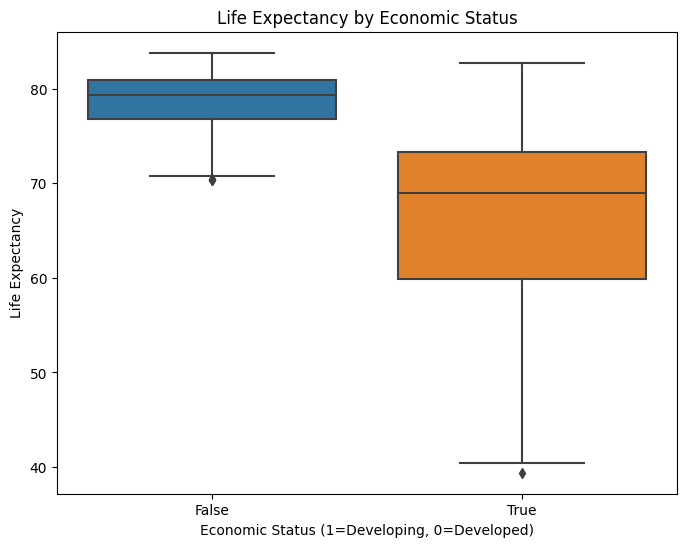

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Economic_Status_Developing', y='Life_expectancy', data=df)
plt.title('Life Expectancy by Economic Status')
plt.xlabel('Economic Status (1=Developing, 0=Developed)')
plt.ylabel('Life Expectancy')
plt.show()

c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


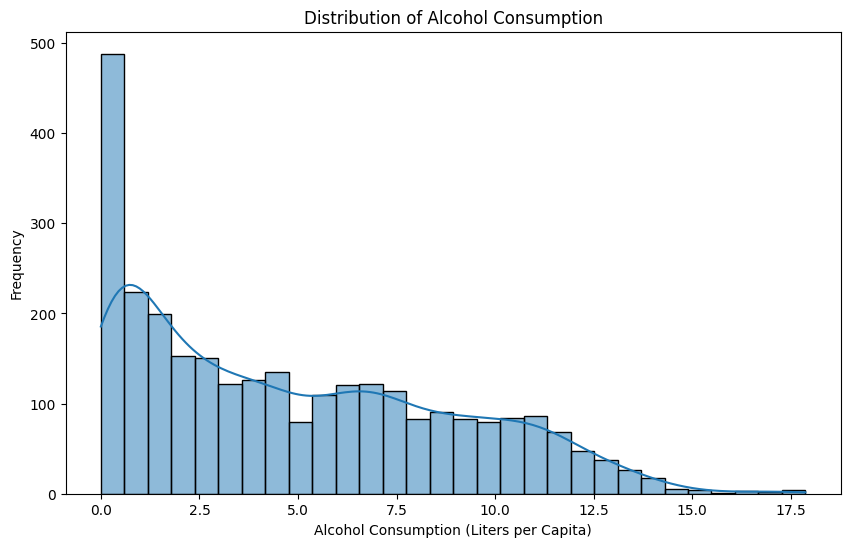

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['Alcohol_consumption'], bins=30, kde=True)
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumption (Liters per Capita)')
plt.ylabel('Frequency')
plt.show()

c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


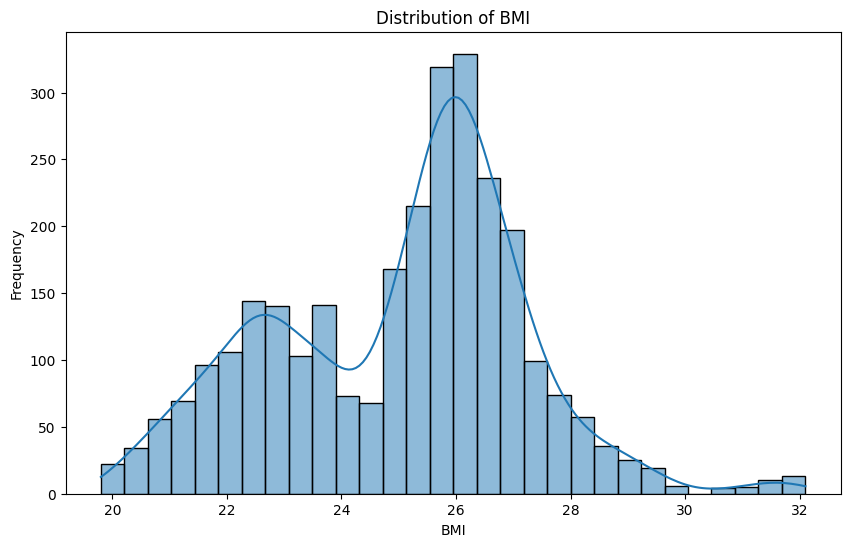

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabme\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

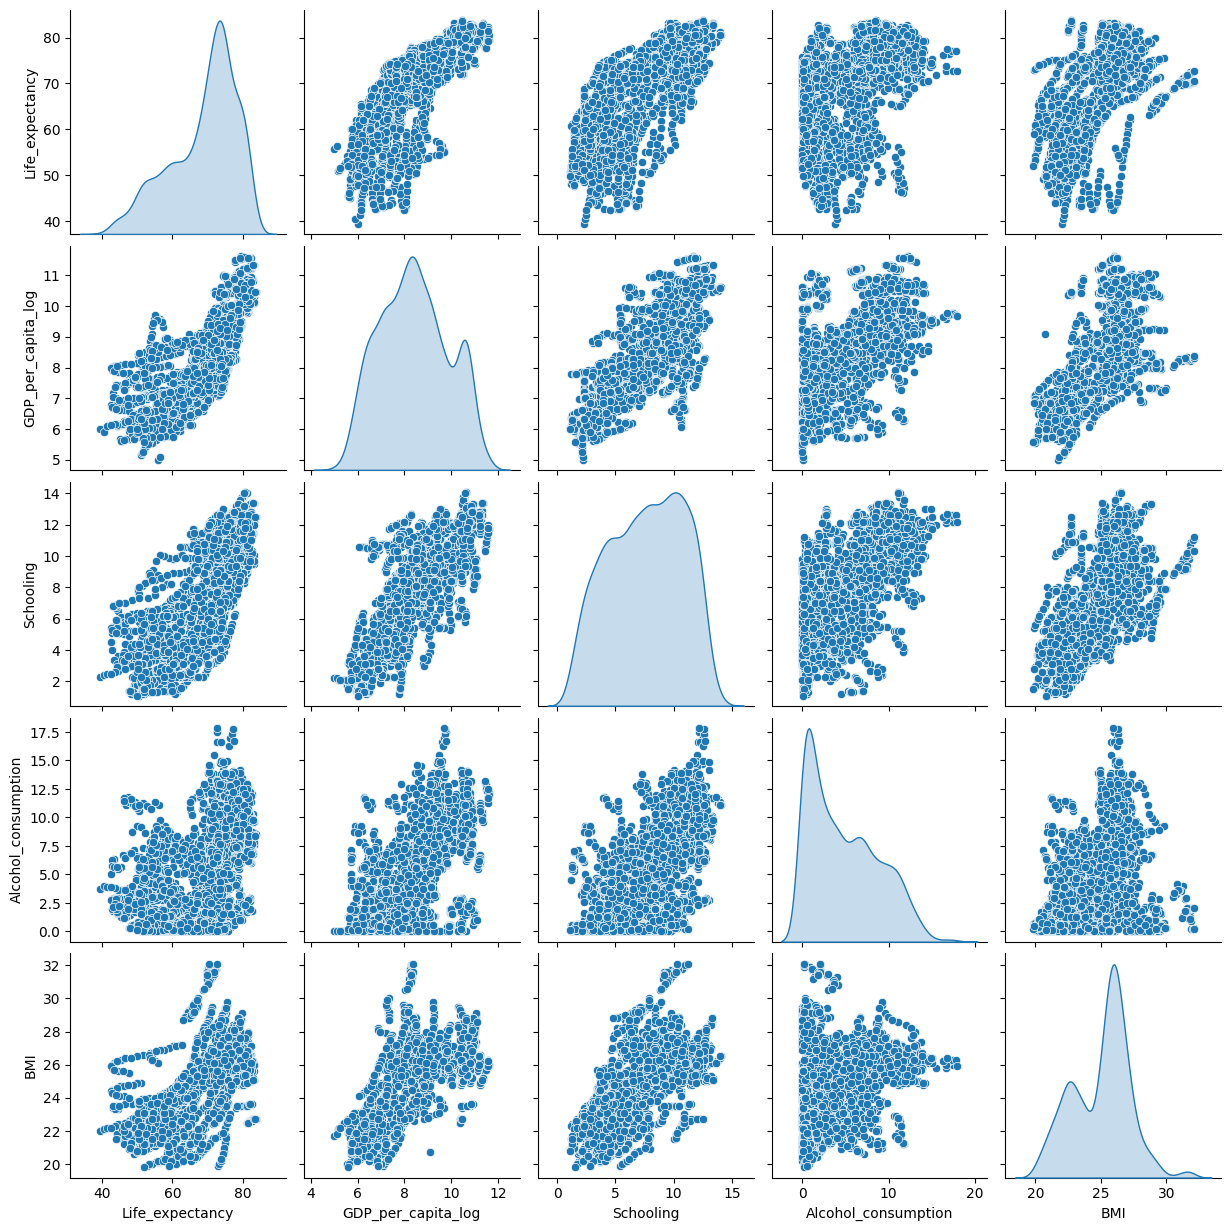

In [16]:
subset = df[['Life_expectancy', 'GDP_per_capita_log', 'Schooling', 'Alcohol_consumption', 'BMI']]
sns.pairplot(subset, diag_kind='kde')
plt.show()

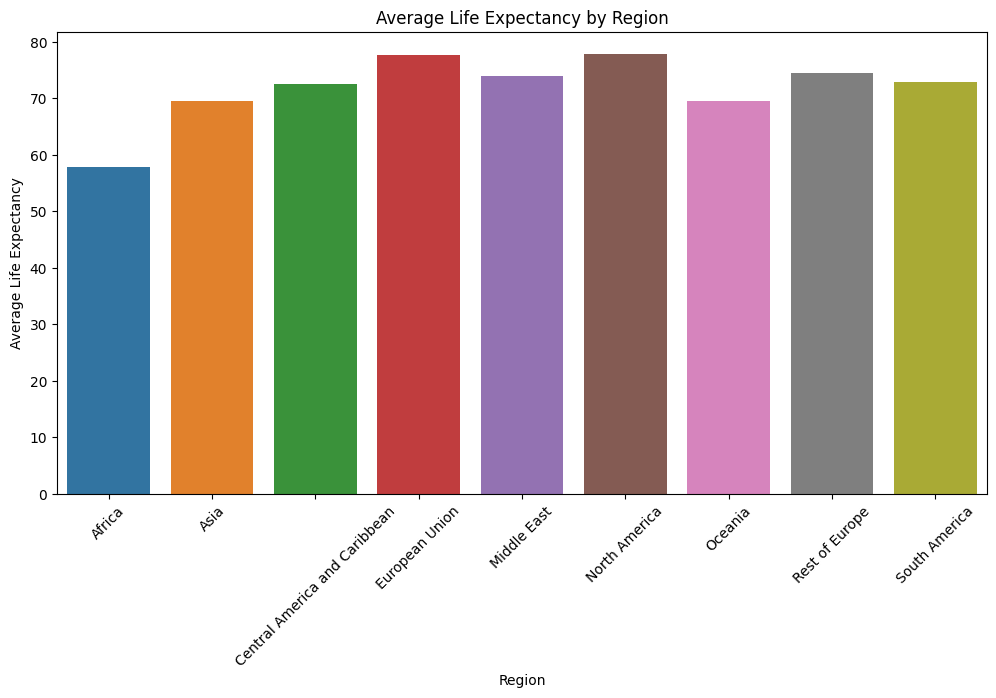

In [17]:
plt.figure(figsize=(12,6))
region_life_expectancy = df.groupby('Region')['Life_expectancy'].mean().reset_index()
sns.barplot(data=region_life_expectancy, x='Region', y='Life_expectancy')
plt.xticks(rotation=45)
plt.title('Average Life Expectancy by Region')
plt.xlabel('Region')
plt.ylabel('Average Life Expectancy')
plt.show()

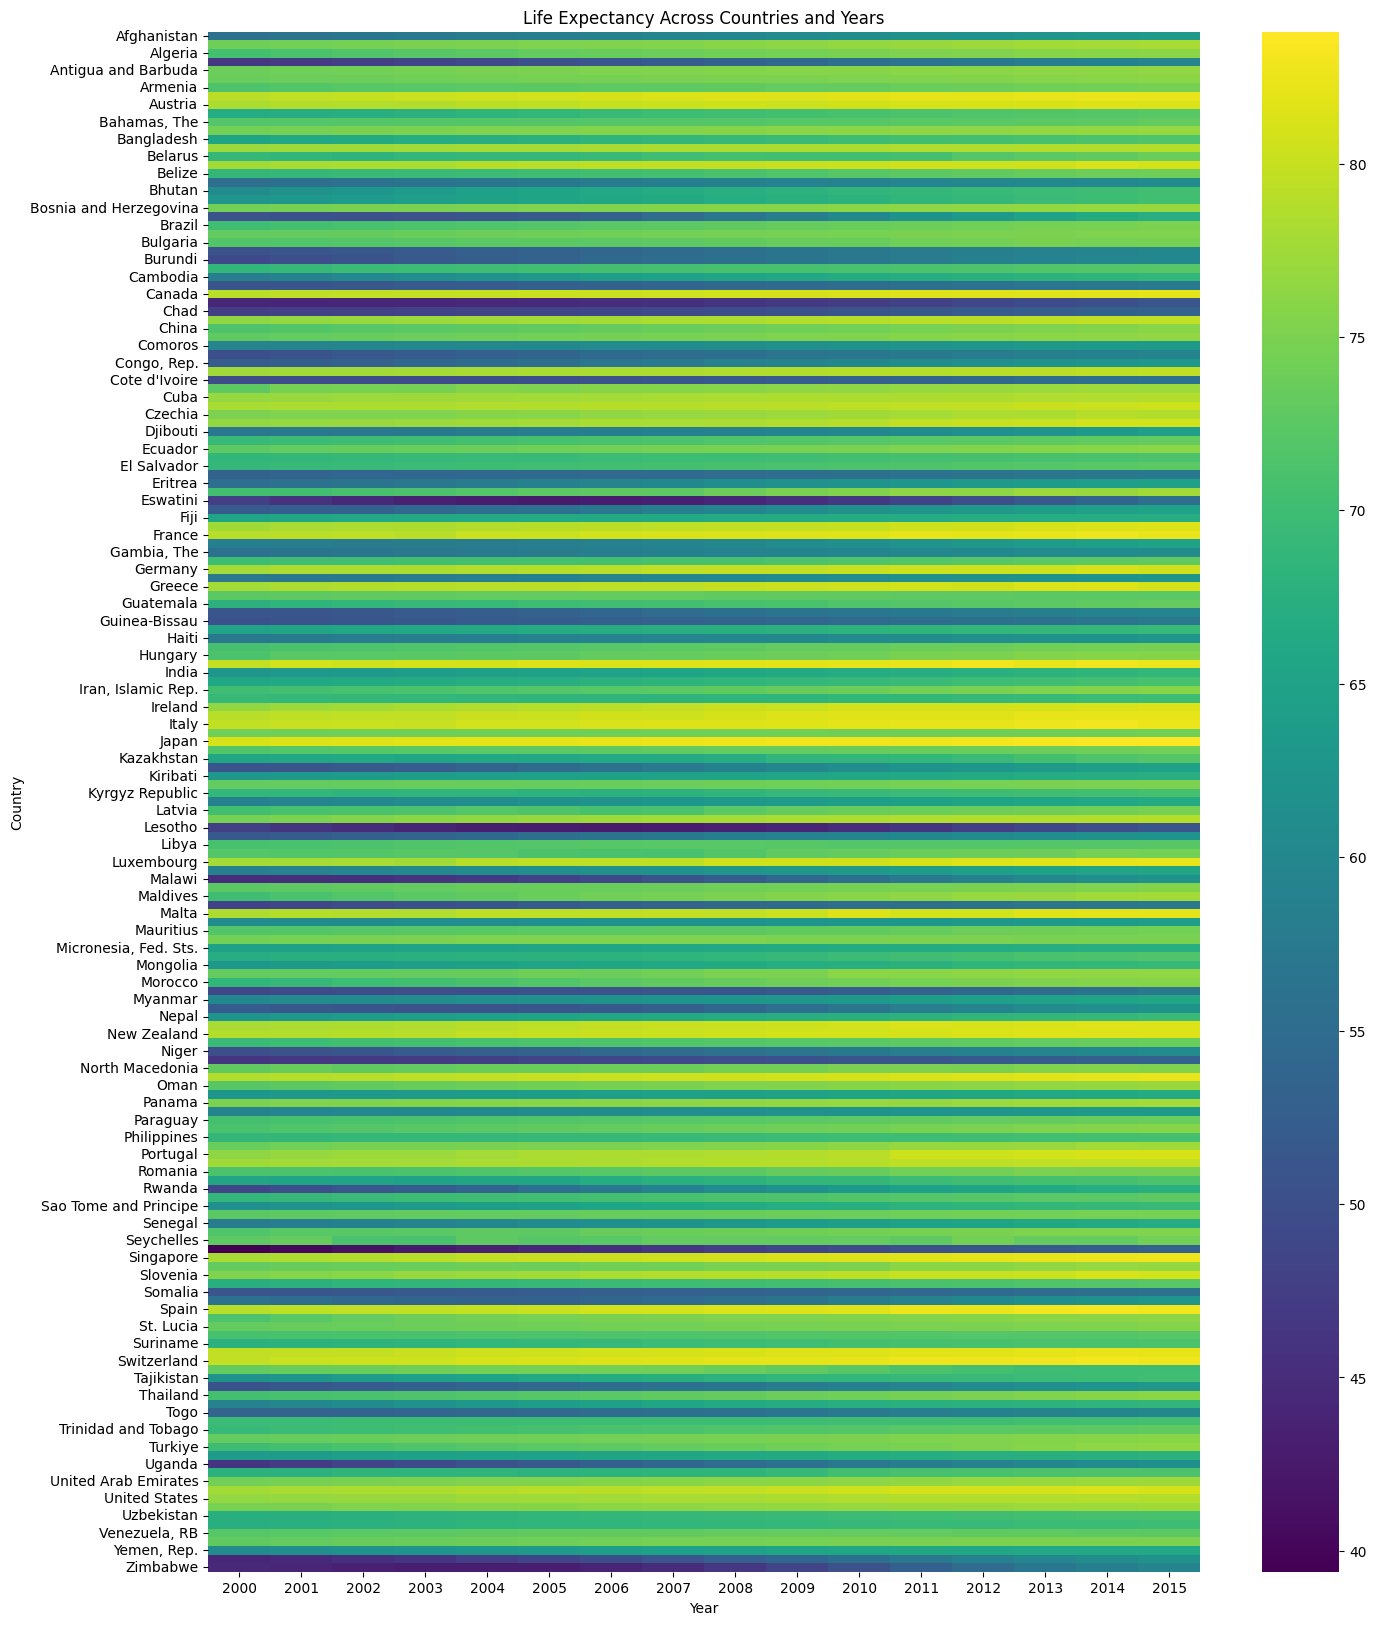

In [18]:
# Pivot the data
pivot_table = df.pivot_table(values='Life_expectancy', index='Country', columns='Year')

# Create the heatmap
plt.figure(figsize=(16,20))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Life Expectancy Across Countries and Years')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()